# 1일차 Review : 같은 문제 다시 풀어보기

    학습은 10번으로!

In [60]:
from sklearn.datasets import load_breast_cancer

In [61]:
cancer = load_breast_cancer()

In [62]:
x = cancer.data
y = cancer.target

In [63]:
x.shape, y.shape

((569, 30), (569,))

In [64]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import *

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [66]:
x_train.shape, y_train.shape

((455, 30), (455,))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


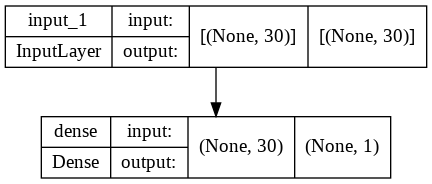

In [67]:
########
# 모델링
########
keras.backend.clear_session()

a = keras.layers.Input(shape=(30,))
b = keras.layers.Dense(1, activation='sigmoid')(a)

model = keras.models.Model(a,b)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [68]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, validation_split=0.2, epochs=10, verbose=1)

Epoch 1/10
12/12 [==============================] - 1s 20ms/step - loss: 10.9616 - accuracy: 0.3187 - val_loss: 10.2838 - val_accuracy: 0.2527
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 7.7507 - accuracy: 0.3516 - val_loss: 9.2745 - val_accuracy: 0.4505
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 7.4224 - accuracy: 0.4011 - val_loss: 8.9834 - val_accuracy: 0.4066
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 6.9447 - accuracy: 0.3901 - val_loss: 8.6584 - val_accuracy: 0.4066
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 6.5938 - accuracy: 0.3819 - val_loss: 8.5210 - val_accuracy: 0.3956
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 6.3403 - accuracy: 0.3874 - val_loss: 8.0557 - val_accuracy: 0.4396
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 5.9730 - accuracy: 0.4231 - val_loss: 7.6763 - val_accuracy: 0.4615
Epoch 8/10
12/12 

In [69]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
y_pred[:5]

array([[1.6344053e-05],
       [4.1697472e-01],
       [9.9377317e-08],
       [5.9510583e-01],
       [6.8073369e-08]], dtype=float32)

In [70]:
y_test[:5]

array([1, 1, 0, 1, 1])

# 히든 레이어 추가하여 모델링!

    히든 레이어 2개를 추가하여 다시 모델링!
    히든 레이어 노드 수 : 32
    히든 레이어 activation = 'relu'

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


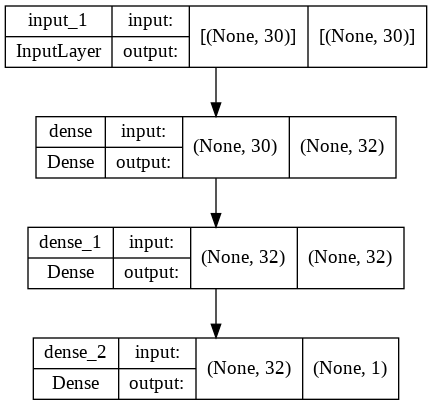

In [71]:
########
# 모델링
########
keras.backend.clear_session()

a = keras.layers.Input(shape=(30,))
h = keras.layers.Dense(32, activation='relu')(a)
h = keras.layers.Dense(32, activation='relu')(h)
b = keras.layers.Dense(1, activation='sigmoid')(h)

model = keras.models.Model(a,b)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [72]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 1s 16ms/step - loss: 12.6670 - accuracy: 0.5962 - val_loss: 4.5530 - val_accuracy: 0.5165
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 2.3727 - accuracy: 0.7610 - val_loss: 1.2170 - val_accuracy: 0.7582
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 1.5581 - accuracy: 0.7473 - val_loss: 0.9942 - val_accuracy: 0.8901
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 1.0315 - accuracy: 0.8352 - val_loss: 0.3369 - val_accuracy: 0.9011
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 1.1416 - accuracy: 0.8462 - val_loss: 0.7702 - val_accuracy: 0.7802
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 1.0073 - accuracy: 0.8104 - val_loss: 0.3894 - val_accuracy: 0.9121
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.7850 - accuracy: 0.8626 - val_loss: 0.2281 - val_accuracy: 0.9341
Epoch 8/10
12/12 [

In [73]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
y_pred[:5]

array([[0.97833145],
       [0.9999658 ],
       [0.9992388 ],
       [0.9999882 ],
       [0.9997077 ]], dtype=float32)

In [74]:
y_test[:5]

array([1, 1, 0, 1, 1])